# **CVPS20 // Midterm Review**

*October 6, 2020*

This notebook will briefly review some of the examples that we have seen in class.

---

In [ ]:
# -- mount Google Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


"Best practice" is to keep all imports at the top of the notebook

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio
import scipy.ndimage.measurements as snm
import scipy.ndimage.morphology as morph
from scipy.ndimage.filters import uniform_filter as uf
from scipy.ndimage.filters import gaussian_filter as gf
from skimage.filters import threshold_otsu
from skimage.data import coins as coin_generator

Set some `matplotlib` defaults (note for Colab, these must be set outside of the cell that imports `matplotlib`)

In [ ]:
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["image.cmap"] = "gist_gray"
plt.rcParams["image.interpolation"] = "nearest"

### Reading and Displaying Images from Google Drive

In [ ]:
# -- set a file name
fname = "/content/drive/My Drive/cvps20/data/examples/axons_eye.jpg"

In [ ]:
# -- read in the image, convert to numpy array, and convert to 0 to 1
img = np.asarray(iio.imread(fname)) / 255.

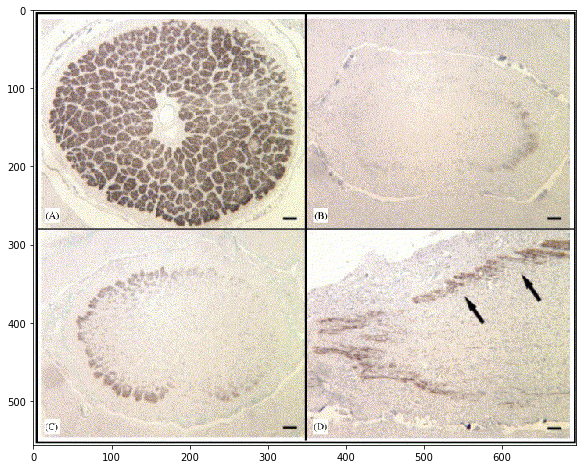

In [ ]:
# -- display the 3-color image
fig, ax = plt.subplots()
ax.imshow(img)
fig.show()

In [ ]:
# -- sub-select only panel (A)
panA = img[8:279, 10:345].copy()

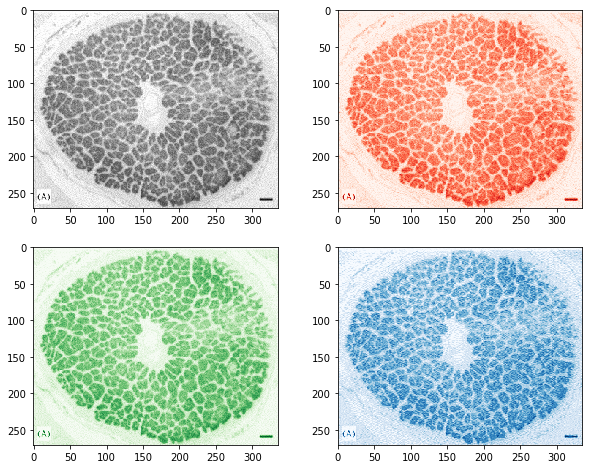

In [ ]:
# -- separate three colors
red = panA[:, :, 0]
grn = panA[:, :, 1]
blu = panA[:, :, 2]

# -- create a luminosity image
panAL = panA.mean(axis=2)

# -- display luminosity and colors separately using a multi-panel figure
fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(panAL)
ax[0, 1].imshow(red, cmap="Reds_r")
ax[1, 0].imshow(grn, cmap="Greens_r")
ax[1, 1].imshow(blu, cmap="Blues_r")
fig.show()

---

### Global Thresholding and Connected-Component Labeling

In [ ]:
# -- load the coins image
coins = coin_generator() / 255.

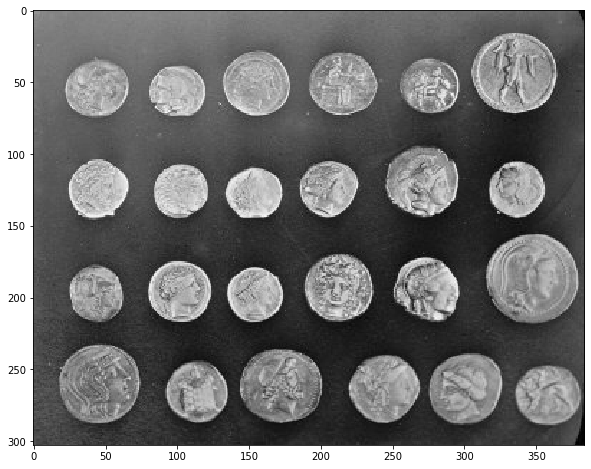

In [ ]:
# -- display it
fig, ax = plt.subplots()
ax.imshow(coins)
fig.show()

In [ ]:
# -- determine the Otsu threshold
othr = threshold_otsu(coins)

In [ ]:
othr

0.4172564338235294

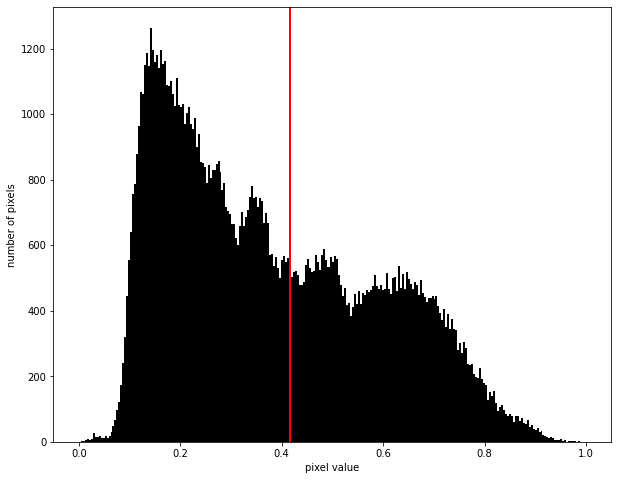

In [ ]:
# -- examine a histogram of pixel values and compare with Otsu threshold
fig, ax = plt.subplots()
ax.hist(coins.flatten(), bins=256, range=[0, 1], color="k")
ax.axvline(othr, color="r", lw=2)
ax.set_xlabel("pixel value")
ax.set_ylabel("number of pixels")
fig.show()

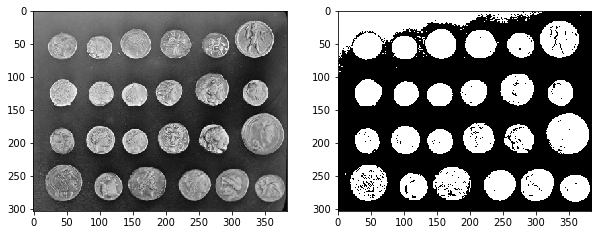

In [ ]:
# -- display the Otsu thresholded image
fig, ax = plt.subplots(1, 2)
ax[0].imshow(coins)
ax[1].imshow(coins > othr)
fig.show()

In [ ]:
# -- define the Otsu thresholded image
thr = coins > othr

In [ ]:
# -- label the connected components
labs, nlabs = snm.label(thr)

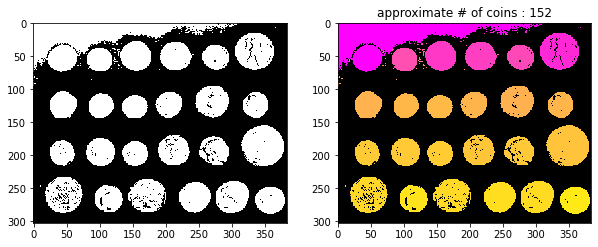

In [ ]:
# -- display the labels
fig, ax = plt.subplots(1, 2)
ax[0].imshow(thr)
ax[1].imshow(labs, cmap="spring", alpha=thr.astype(float))
ax[1].set_facecolor("k")
ax[1].set_title("approximate # of coins : {0}".format(nlabs))
fig.show()

---

### Binay Morphological Operations

In [ ]:
# -- clean up the thresholded image with morphological operations
thr_cl = morph.binary_erosion(thr, iterations=3)

# -- re-label
labs, nlabs = snm.label(thr_cl)

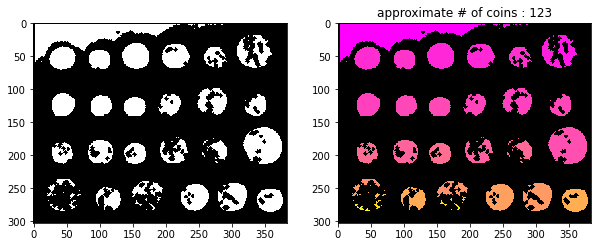

In [ ]:
# -- display labels
fig, ax = plt.subplots(1, 2)
ax[0].imshow(thr_cl)
ax[1].imshow(labs, cmap="spring", alpha=thr_cl.astype(float))
ax[1].set_facecolor("k")
ax[1].set_title("approximate # of coins : {0}".format(nlabs))
fig.show()

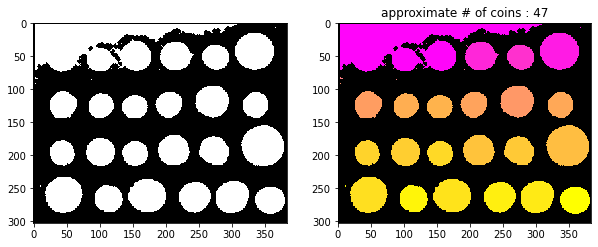

In [ ]:
# -- clean up the thresholded image with morphological operations
thr_cl = morph.binary_closing(thr, iterations=3)

# -- re-label
labs, nlabs = snm.label(thr_cl)

# -- display labels
fig, ax = plt.subplots(1, 2)
ax[0].imshow(thr_cl)
ax[1].imshow(labs, cmap="spring", alpha=thr_cl.astype(float))
ax[1].set_facecolor("k")
ax[1].set_title("approximate # of coins : {0}".format(nlabs))
fig.show()

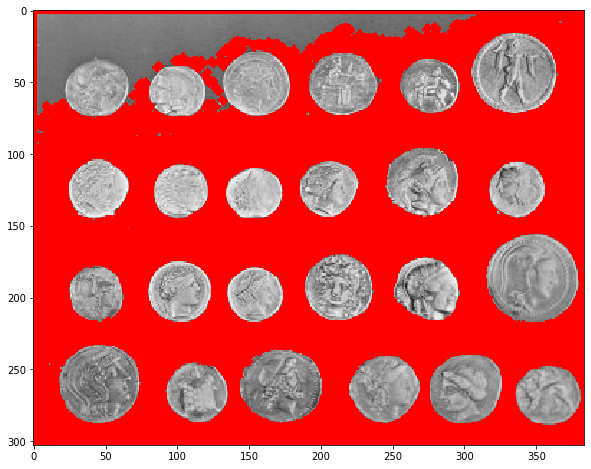

In [ ]:
# -- example of using alpha to control individual pixel transparency
fig, ax = plt.subplots()
ax.imshow(coins, alpha=thr_cl.astype(float))
ax.set_facecolor("red")
fig.show()

---

### Filtering and Local Thresholding

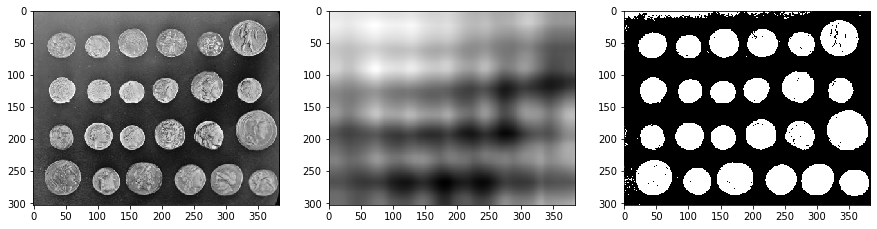

In [ ]:
# -- smooth coins with a uniform filter
coins_sm = uf(coins, 100)

# -- threshold based on the mean value of the surrounding 100x100 pixels
thr = coins > coins_sm

# -- display the locally thresholded image
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(coins)
ax[1].imshow(coins_sm)
ax[2].imshow(thr)
fig.show()

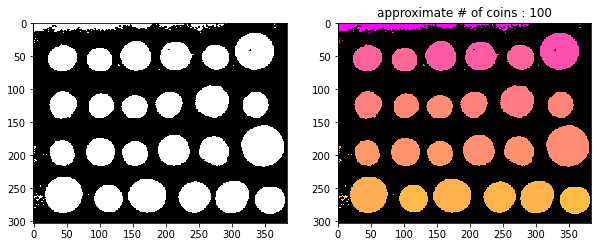

In [ ]:
# -- clean up the locally thresholded image with morphology operations
thr_cl = morph.binary_opening(thr)
thr_cl = morph.binary_closing(thr)

# -- re-label
labs, nlabs = snm.label(thr_cl)

# -- display labels
fig, ax = plt.subplots(1, 2)
ax[0].imshow(thr_cl)
ax[1].imshow(labs, cmap="spring", alpha=thr_cl.astype(float))
ax[1].set_facecolor("k")
ax[1].set_title("approximate # of coins : {0}".format(nlabs))
fig.show()

---

### Edge Detection with Finite Differencing

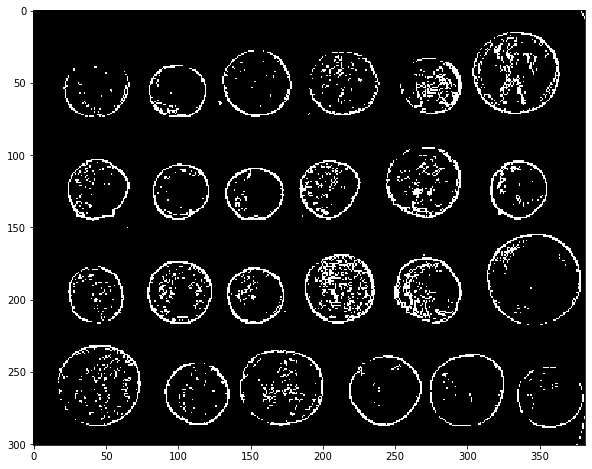

In [ ]:
# -- shift image by one column and difference
hor = coins[1:-1, 1:-1] - coins[1:-1, :-2]

# -- shift image by one row and difference
ver = coins[1:-1, 1:-1] - coins[:-2, 1:-1]

# -- calculate the amplitude of the difference (gradient)
tot = np.sqrt(hor**2 + ver**2)

# -- display it
plt.imshow(tot > 0.2)

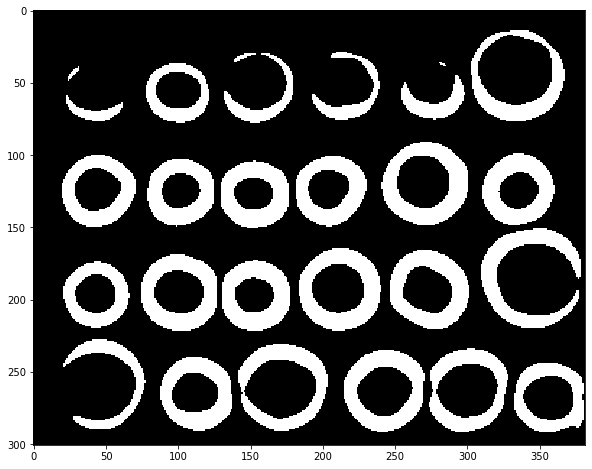

In [ ]:
# -- Gaussian filter to smooth out noise and small scale structure
coins_gf = gf(coins, 5)

# -- construct the Gaussian difference
hor = coins_gf[1:-1, 1:-1] - coins_gf[1:-1, :-2]
ver = coins_gf[1:-1, 1:-1] - coins_gf[:-2, 1:-1]
tot = np.sqrt(hor**2 + ver**2)

# -- show it
plt.imshow(tot > 0.02)

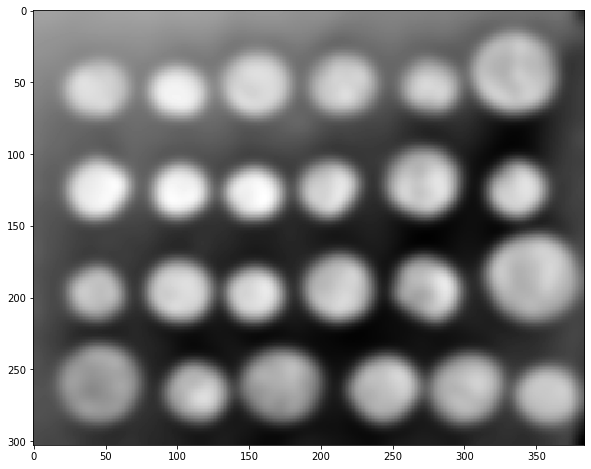

In [ ]:
plt.imshow(coins_gf)